#### Diplomado en Ciencia de Datos
Módulo 2: Business Intelligence  
## **Tema 3: Data Storytelling**

*Notebook by [Pedro V Hernandez Serrano](https://github.com/pedrohserrano)*

---
![](../img/header.jpg)

# Creando narrativas de datos desde un jupyter notebook

El poder de los lenguajes de programación es tal que nos permite crear **librerías (o paquetes)** reutilizables cuyo propósito es resolver tareas específicas. Mi ejemplo favorito del uso de python en la visualización de datos evento científico reciente, en el que la Dra. Katie Bouman lideró el equipo que "tomó una fotografía" de un agujero negro por primera vez en la historia utilizando únicamente bibliotecas de Python para lograrlo. Historia aquí: ["how imaging a blackhole gives us one more reason to embrace python for larger datasets?](https://analyticsindiamag.com/how-imaging-a-blackhole-gives-us-one-more-reason-to-embrace-python-for-larger-datasets/)

Los ejemplos que se dan en este notebook se han adaptado del [artículo de anuncio de Medium](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) que presenta [Plotly Express](https://plotly.express): una **biblioteca** basada en `Plotly.py` para la exploración rápida de datos y la generación de gráficas.

**Nota:** Dado que **Plotly Express** es una biblioteca externa, es necesario instalarla antes de ejecutarla.

```shell
!pip install plotly
```

In [ ]:
!pip install plotly

In [2]:
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 994.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


## The Data: Global flows

Para este notebook, usaremos el [ejemplo de Gapminder](https://www.gapminder.org/fw/world-health-chart/), un dataset que ya está contenido en la biblioteca de Plotly, pero también en un CSV en este repo. El dataset contiene información sobre la esperanza de vida, la población y el PIB per cápita de los países por año.

In [3]:
import pandas as pd
dataset = pd.read_csv('../data/gapminder_data_world_health.csv')

---
## Regla general para graficar en Plotly express

```python
px._______(data = ____, x=_____, y=_____, other_paremeters=____)


px.scatter(data=dataset, x=variable_x, y=variable_y)
```

**Creating advanced visualizations**

The following command will: Use the `data2007` cut. Take the `gdpPercap` as **X** axis and `lifeExp` as **Y** axis value. Render a scatter plot.  
**Note:** you can hover your cursor on the plot and explore individual data elements.

# EJERCICIO 1

- Haz un query que filtre el año 1997 y se cree un subset
- Crea una gráfica de disperción con la función `px.scatter` que compare el GDP per capita y la esperanza de vida

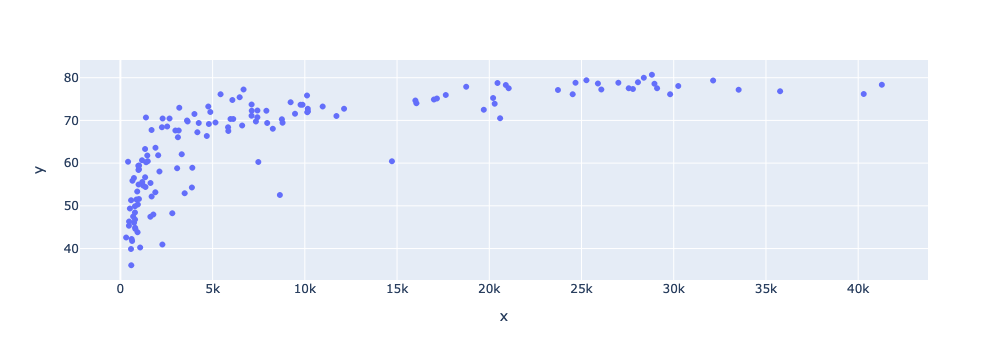

In [15]:
# px._______(data = ____, x=_____, y=_____, other_paremeters=____)
df = dataset.copy()
df_f = df[df["year"]==1997]
fig = px.scatter(x=df_f["gdpPercap"], y=df_f["lifeExp"])
fig.show()

**Adding Color and Size**

The following command is very similar than the last one, except that this contains **new parameters** within the function: `color`, `size` and `size_max`.   

**Note:** You can scroll down the values and also use the zoom option in the plot

# EJERCICIO 2

- Utiliza el mismo subset del datos del 2007
- Crea de nuevo una gráfica de disperción incluyendo nuevos parámetros: `color`, `size` y `size_max`
Nota: `color` tiene que ser una variable categórica, y `size` una variable numérica

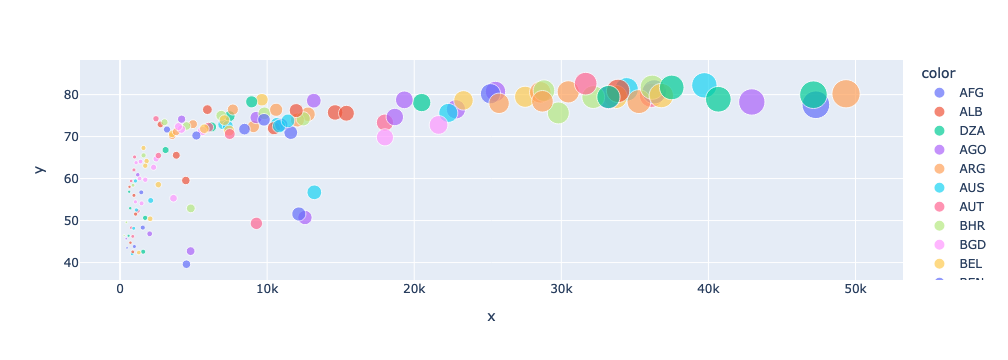

In [17]:
# px._______(data = ____, x=_____, y=_____, other_paremeters=____)
df_f = df[df["year"]==2007]
fig = px.scatter(x=df_f["gdpPercap"],y=df_f["lifeExp"], size=df_f["gdpPercap"], color=df_f["iso_alpha"])
fig.show()

**Understanding a graphic**

Everytime a new parameter is added to the formula, the plotting result is changing.

# EJERCICIO 3

- Utiliza la misma gráfica de dispersión, ahora queremos responder algunas preguntas para la narrativa de datos
- Agrega los siguientes parámetros para tener una mejor gráfica
```python
facet_col="continent", log_x=True, trendline="ols", hover_name="country"
```
Responde: 
- Si se cambia `log_x=False` por `log_x=True`, que es lo que pasa?
- Que pais tiene el GPD per capita más bajo en asia?
- Que paises tienen la esperanza de vida más alta en Africa

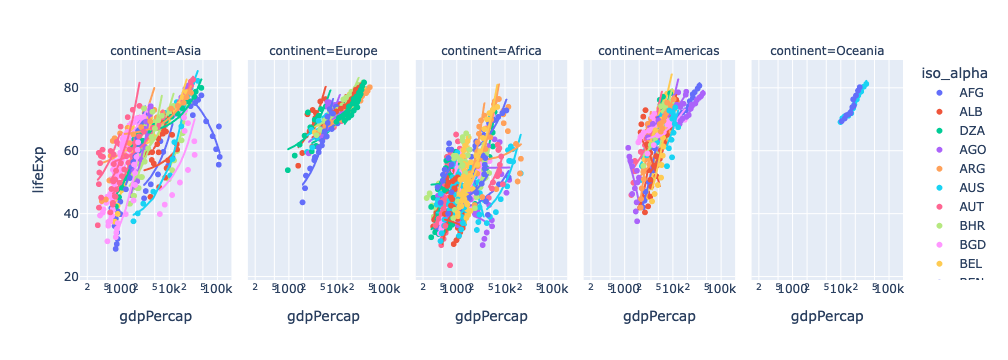

In [24]:
# px._______(data = ____, x=_____, y=_____, other_paremeters=____)
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="iso_alpha", facet_col="continent", log_x=True, trendline="ols", hover_name="country")
fig.show()
# Responde:

Si se cambia log_x a "True", sucede un cambio en el eje x, en el cual podemos ver mas a detalle los datos, dicho coloquialmente "estira" la escala.

El pais con gdp mas bajo es Myanmar.

El pais con mayor esperanza es Japon.

**Quantity over time**

Creating a country subset so that we can analyse data over time. Take the `year` as X axis and `lifeExp` (Population) as Y axis value. Render an horizontal bar plot.  

# EJERCICIO 4 

- Elije un país para aplicar el filtro/query
- Crea una gráfica de barras `px.bar()` donde los años sean el eje x y la población el eje y
- Encuentra el botón para descargar la imagen y descargala en el mismo folder de tareas

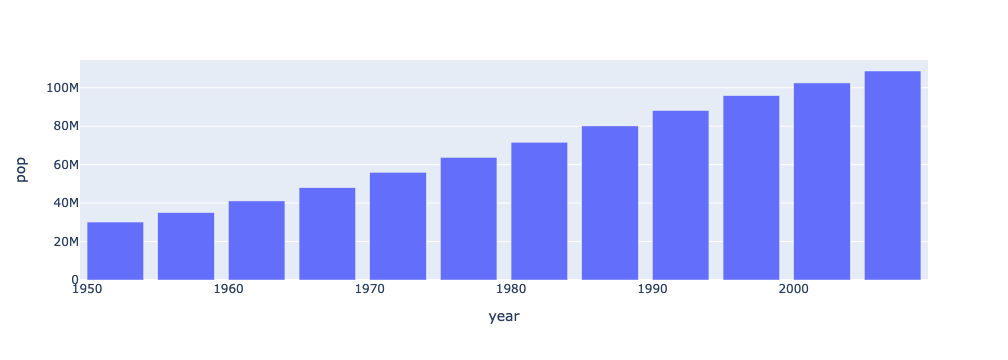

In [26]:
# px._______(data = ____, x=_____, y=_____)
df_f = df[df["country"]=="Mexico"]
fig = px.bar(df_f, x="year", y="pop")
fig.show()

**Animated plot**

There is a new play/stop button inside the graph, click on it and enjoy the visuals!  
## What would it be your **data story**?

# EJERCICIO 5 

- La misma función `px.scatter` tiene parámetros para animarla!
- Utiliza la misma gráfica e incluye ahora  `animation_frame="year"`, `animation_group="country"` y ve lo que sucede

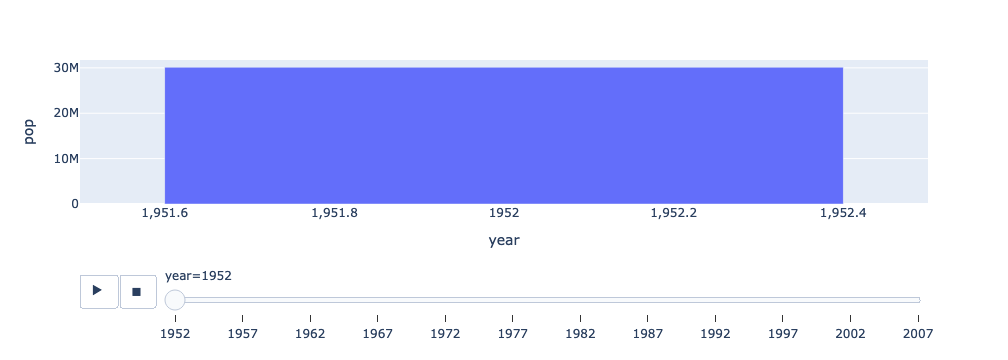

In [27]:
# px._______(data = ____, x=_____, y=_____)
fig = px.bar(df_f, x="year", y="pop", animation_frame="year", animation_group="country")
fig.show()

Because this is geographic data, we can also represent it as an animated map, which makes it clear that `px` can make way more than just scatterplots.

## 🎉🎉 Congrats!!  

## You've finished the notebook